In [ ]:
# step 1:

# imports of libraries essential for this project

In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE' #used to fix an error with matplotlib

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [4]:
# trasforming the imgaes to the same format and propeties, which is essential for efficient training and testing.
# transforms.ToTensor() - converts the imput images into a PyTorch tensor. this converts the image to a matrix that can be undestandable by the system.
# it separates the image into three color channels, red, greed and blue. and sets each pixels to a brightness value of each color. then, it scales the pixels
# down to a range of between 0 and 1. this trasforms the image into a TorchTensor.
# transforms.Normalize((0.5,), (0.5,)) - this normalizes the pixel values of the tensor with the mean and standard deviation. the 0.5 represents the mean vlaue.

In [5]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [6]:
# downloading the data sets, shuffleing them and trasforming each of them. 

In [7]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [13]:
# step 2:

# doing some data analysis on our images and tensors. we check out the shape of the images and the labels.

In [15]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [17]:
# this shows us that there are 64 images in each batch and each image has a dinmension of 28 x 28 pixels.

In [19]:
# displaying one image from the traning set:

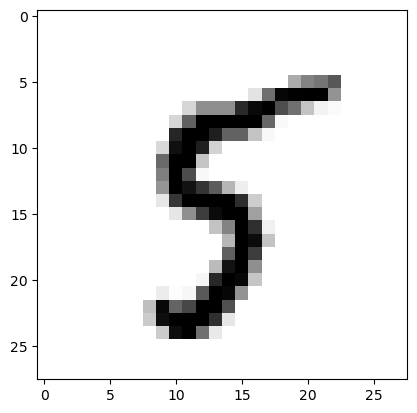

In [21]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

In [23]:
# showing many images

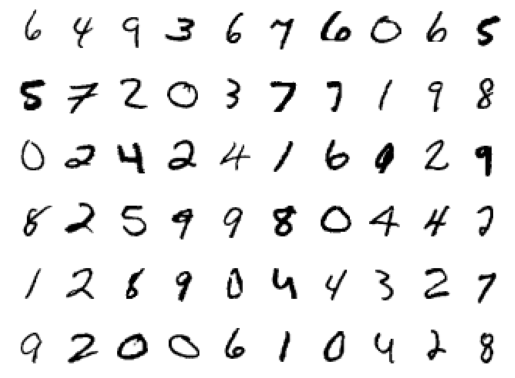

In [25]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [24]:
# step 3:

# building the neural network:

In [27]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [26]:
# the nn.Sequential shows the laters in the neural network. three linear laters adn ReLU activiation functions
# (only positive numbers. negative numbers are set to 0)
# the output layer is a linear later with LogSoftmax activation function because this is a classification problem.(log of Softmax function)
# the amount of neurans are set becasue of these factors: 
# input layer has 784 neurans because of having 784 pixels as input. 
# output layer has 10 neurons because of having 10 outputs.

# next we define the loss function as a negative log likelihood loss. this is to train a classification problem with C classes.
#

In [27]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [33]:
# step 4:

# traning the network and showing the loss adjastment:

In [35]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        [-0.0012, -0.0012, -0.0012,  ..., -0.0012, -0.0012, -0.0012],
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
        ...,
        [-0.0025, -0.0025, -0.0025,  ..., -0.0025, -0.0025, -0.0025],
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002]])


In [37]:
# before the backward pass, the model weights are set to default none values. 
# once, we call the backward function, the weights are updated.

In [39]:
# step 5:

# the code training process is where the NN iterates over the training set and updates the weights. it is done by gradient descent and back-propagation.
# in each epoch (number of times we iterate over thew training set), we will be seeing a gradual decrease in training loss.

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6341167698298563
Epoch 1 - Training loss: 0.2840107326377938
Epoch 2 - Training loss: 0.21730026989571574
Epoch 3 - Training loss: 0.17447063357813525
Epoch 4 - Training loss: 0.1452913881698524
Epoch 5 - Training loss: 0.1248022610329584
Epoch 6 - Training loss: 0.10872896339919076
Epoch 7 - Training loss: 0.09754473085739593
Epoch 8 - Training loss: 0.08815986884168105
Epoch 9 - Training loss: 0.0797769163818613
Epoch 10 - Training loss: 0.07310852037319766
Epoch 11 - Training loss: 0.06771468221178172
Epoch 12 - Training loss: 0.06031347073039719
Epoch 13 - Training loss: 0.057178180928387716


In [ ]:
# step 6:

# the model is ready. Now it is time to evaluate it. 
# view_classify is a utility function who shows the image and class probabilites that were are predicted.

In [29]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.cpu().data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

In [ ]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [ ]:
# model evaluation:

In [ ]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

In [ ]:
# step 7:

#saving the model.

In [ ]:
torch.save(model, './my_mnist_model.pt') 

In [ ]:
# generating a figure to test the neural network.

In [ ]:
from PIL import Image

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert image to grayscale (if not already)
    transforms.Resize((28, 28)),  # Resize to 28x28 pixels
    transforms.ToTensor(),  # Convert to PyTorch tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize (same as the MNIST dataset)
])

def process_image(image_path):
    """Load and preprocess the image."""
    image = Image.open(image_path)  # Open the image file
    image = transform(image)  # Apply transformations (resize, grayscale, tensor, normalization)
    image = image.view(1, 784)  # Flatten the image to match the input format for the neural network
    return image

image_path = "oneOrTwo.png"
img = process_image(image_path)

# Predict the digit
with torch.no_grad():
    logps = model(img)

# Get the probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))

# View the image and its prediction probabilities
view_classify(img.view(1, 28, 28), ps)

In [ ]:

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert image to grayscale (if not already)
    transforms.Resize((28, 28)),  # Resize to 28x28 pixels
    transforms.ToTensor(),  # Convert to PyTorch tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize (same as the MNIST dataset)
])

def process_image(image_path):
    """Load and preprocess the image."""
    image = Image.open(image_path)  # Open the image file
    image = transform(image)  # Apply transformations (resize, grayscale, tensor, normalization)
    image = image.view(1, 784)  # Flatten the image to match the input format for the neural network
    return image

image_path = "z.png"
img = process_image(image_path)

# Predict the digit
with torch.no_grad():
    logps = model(img)

# Get the probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))

# View the image and its prediction probabilities
view_classify(img.view(1, 28, 28), ps)

In [ ]:

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert image to grayscale (if not already)
    transforms.Resize((28, 28)),  # Resize to 28x28 pixels
    transforms.ToTensor(),  # Convert to PyTorch tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize (same as the MNIST dataset)
])

def process_image(image_path):
    """Load and preprocess the image."""
    image = Image.open(image_path)  # Open the image file
    image = transform(image)  # Apply transformations (resize, grayscale, tensor, normalization)
    image = image.view(1, 784)  # Flatten the image to match the input format for the neural network
    return image

image_path = "5.png"
img = process_image(image_path)

# Predict the digit
with torch.no_grad():
    logps = model(img)

# Get the probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))

# View the image and its prediction probabilities
view_classify(img.view(1, 28, 28), ps)

In [1]:

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert image to grayscale (if not already)
    transforms.Resize((28, 28)),  # Resize to 28x28 pixels
    transforms.ToTensor(),  # Convert to PyTorch tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize (same as the MNIST dataset)
])

def process_image(image_path):
    """Load and preprocess the image."""
    image = Image.open(image_path)  # Open the image file
    image = transform(image)  # Apply transformations (resize, grayscale, tensor, normalization)
    image = image.view(1, 784)  # Flatten the image to match the input format for the neural network
    return image

image_path = "3.png"
img = process_image(image_path)

# Predict the digit
with torch.no_grad():
    logps = model(img)

# Get the probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))

# View the image and its prediction probabilities
view_classify(img.view(1, 28, 28), ps)

NameError: name 'transforms' is not defined